kmeans clustering

hirarchical clustering

dbscan clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[100,110],[1000,1200]])

In [3]:
X.dtype

dtype('int64')

In [4]:
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [5]:
kmeans = KMeans(n_clusters=4)

In [6]:
kmeans.fit(X)

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
kmeans.labels_

array([0, 0, 0, 3, 3, 3, 2, 1], dtype=int32)

In [8]:
data=pd.DataFrame(X)

In [9]:
labels=pd.DataFrame(kmeans.labels_)

In [10]:
datawithlabel=pd.concat([data,labels],axis=1)

In [11]:
datawithlabel

,0,1,0
0,1,2,0
1,1,4,0
2,1,0,0
3,10,2,3
4,10,4,3
5,10,0,3
6,100,110,2
7,1000,1200,1


In [12]:
np.array([[0, 0], [12, 3]])

array([[ 0,  0],
       [12,  3]])

In [13]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 3], dtype=int32)

In [14]:
kmeans.cluster_centers_


array([[1.0e+00, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+01, 2.0e+00]])

In [15]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

In [16]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [17]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

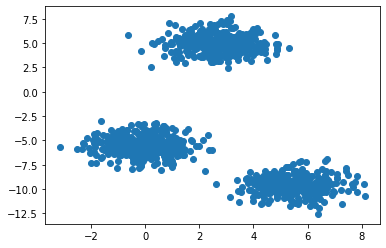

In [18]:
plt.scatter(X[:,0],X[:,1])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [20]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)
    

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/si

In [21]:
wcss

[6350.499237030179,
 1230.8405264123764,
 1083.0673959855267,
 934.7698999121162,
 818.6598863644565,
 708.1987366939477,
 607.059218389229,
 528.680803981086,
 486.4487305079185]

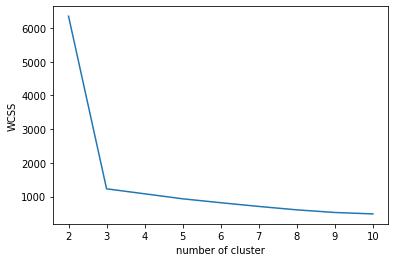

In [22]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

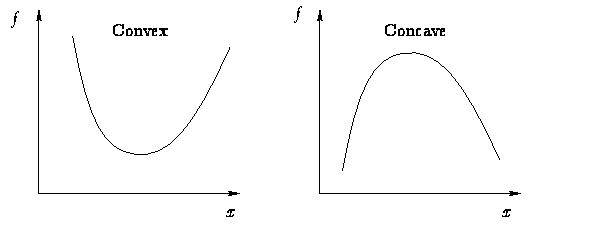|

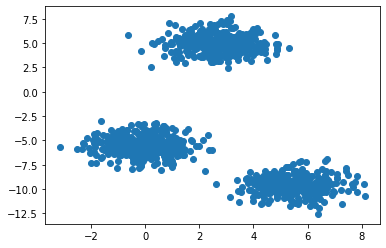

In [23]:
plt.scatter(X[:,0],X[:,1])

In [24]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [25]:
y_lables=kmeans.fit_predict(X_train)

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
y_lables

array([2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2,

In [27]:
y_train

array([2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2,

In [28]:
X_train[:,0]

array([-1.41832204e+00,  4.48697951e+00,  2.24704936e-01,  5.02494005e+00,
       -1.20566991e+00, -2.40528658e-01,  4.53522594e+00,  3.24289824e+00,
        6.37353894e+00,  3.51963962e+00,  9.40643276e-01,  3.33435966e+00,
       -1.84803616e+00,  2.79746994e-01, -1.66299054e-01,  9.88739486e-01,
        1.10858193e+00, -6.71428928e-01,  3.03222019e+00, -1.88949319e-01,
        5.37758235e+00,  3.97323375e+00,  6.51163994e+00,  5.26001217e+00,
        3.87259410e+00,  5.29579194e+00,  2.93975071e+00, -1.42179319e+00,
        4.34083423e+00,  2.43172588e+00, -9.12224291e-01, -1.78309239e+00,
        3.39546910e+00,  3.44338367e+00,  1.55855578e+00,  5.45250939e+00,
        7.83073847e+00,  6.23354172e-01,  6.40648699e+00,  8.18809420e-01,
        6.70146197e+00,  3.83803205e+00,  2.66513548e+00,  4.98738663e+00,
        1.24625586e+00,  6.34773330e+00,  5.61898570e+00, -1.03617272e+00,
        3.71294266e+00,  9.25618971e-01,  3.17537051e+00,  4.87785040e+00,
        1.25485940e-01,  

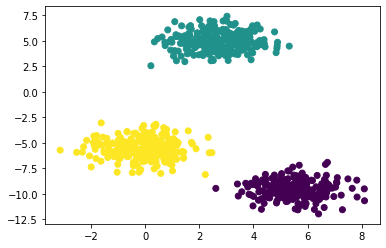

In [29]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [30]:
wcss

[6350.499237030179,
 1230.8405264123764,
 1083.0673959855267,
 934.7698999121162,
 818.6598863644565,
 708.1987366939477,
 607.059218389229,
 528.680803981086,
 486.4487305079185]

In [36]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [38]:
!pip install kneed

In [32]:
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

NameError: name 'KneeLocator' is not defined

In [33]:
k.elbow

AttributeError: 'int' object has no attribute 'elbow'

In [34]:
from sklearn.metrics import silhouette_score

In [9]:
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [10]:
silhouette_coefficients

[0.7273220153669463,
 0.7835543034796946,
 0.6296864214964658,
 0.44467573166547414,
 0.31462644441690624,
 0.3279696423058667,
 0.341213768252892,
 0.3488979056718377,
 0.3441929537548391]

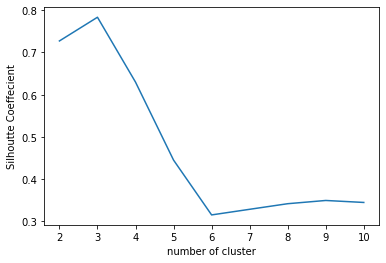

In [11]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [ ]:
# you have a data set

# unsupervised+supervised=semisupervised

classification data(wafer data)

you have a multiple files 

take all the files and create a single dataframe

then you have to perform clustering(kmean,hirarchical,dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg,svc,DTC,RF, boosting classifier) on each and every cluster
and find out the best algorithm
